<a href="https://colab.research.google.com/github/ArezooAalipanah/machine_learning3/blob/main/HML3_ch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 3 - Classification**


In [1]:
# step1: importing MNIST
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml("mnist_784", as_frame=False)
"""
as_frame : If True, the data is a pandas DataFrame including columns with
appropriate dtypes (numeric, string or categorical). The target is
a pandas DataFrame or Series depending on the number of target_columns.
The Bunch will contain a frame attribute with the target and the
data. If return_X_y is True, then (data, target) will be pandas
DataFrames or Series as describe above.
    If as_frame is 'auto', the data and target will be converted to
DataFrame or Series as if as_frame is set to True, unless the dataset
is stored in sparse format.
    If as_frame is False, the data and target will be NumPy arrays and
the data will only contain numerical values when parser="liac-arff"
where the categories are provided in the attribute categories of the
Bunch instance. When parser="pandas", no ordinal encoding is made.
"""

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


'\nas_frame : If True, the data is a pandas DataFrame including columns with\nappropriate dtypes (numeric, string or categorical). The target is\na pandas DataFrame or Series depending on the number of target_columns.\nThe Bunch will contain a frame attribute with the target and the\ndata. If return_X_y is True, then (data, target) will be pandas\nDataFrames or Series as describe above.\n    If as_frame is \'auto\', the data and target will be converted to\nDataFrame or Series as if as_frame is set to True, unless the dataset\nis stored in sparse format.\n    If as_frame is False, the data and target will be NumPy arrays and\nthe data will only contain numerical values when parser="liac-arff"\nwhere the categories are provided in the attribute categories of the\nBunch instance. When parser="pandas", no ordinal encoding is made.\n'

In [3]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
type(mnist)


sklearn.utils._bunch.Bunch

In [6]:
mnist.values()

dict_values([array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), None, {}, ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pi

In [7]:
X, y = mnist.data ,  mnist.target

In [8]:
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
X[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [10]:
X.shape

(70000, 784)

In [11]:
y


array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [12]:
y.shape

(70000,)

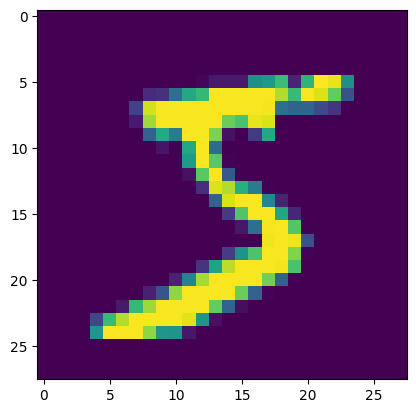

In [13]:
#printing one io the data as img
import matplotlib.pyplot as plt

def plot_digit2(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image)


some_digit = X[0]
plot_digit2(some_digit)

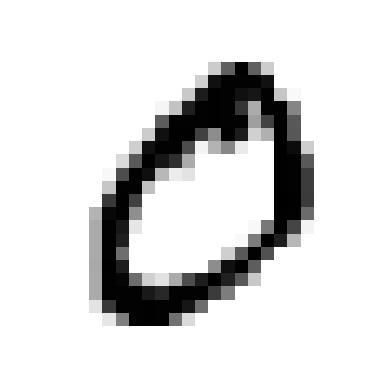

In [14]:

def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap = "binary")
  plt.axis("off")


some_digit = X[1]
plot_digit(some_digit)
plt.show()

In [15]:
y[0], y[1]

('5', '0')

In [16]:
enumerate(X[:2])

In [17]:
print(enumerate(X[:2]))

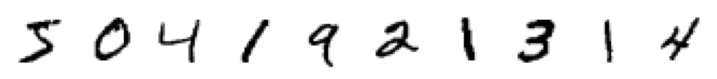

In [18]:
plt.figure(figsize=(9,9))
for index , image_data in enumerate(X[:10]):
  plt.subplot(1,10, index+1)
  plot_digit(image_data)


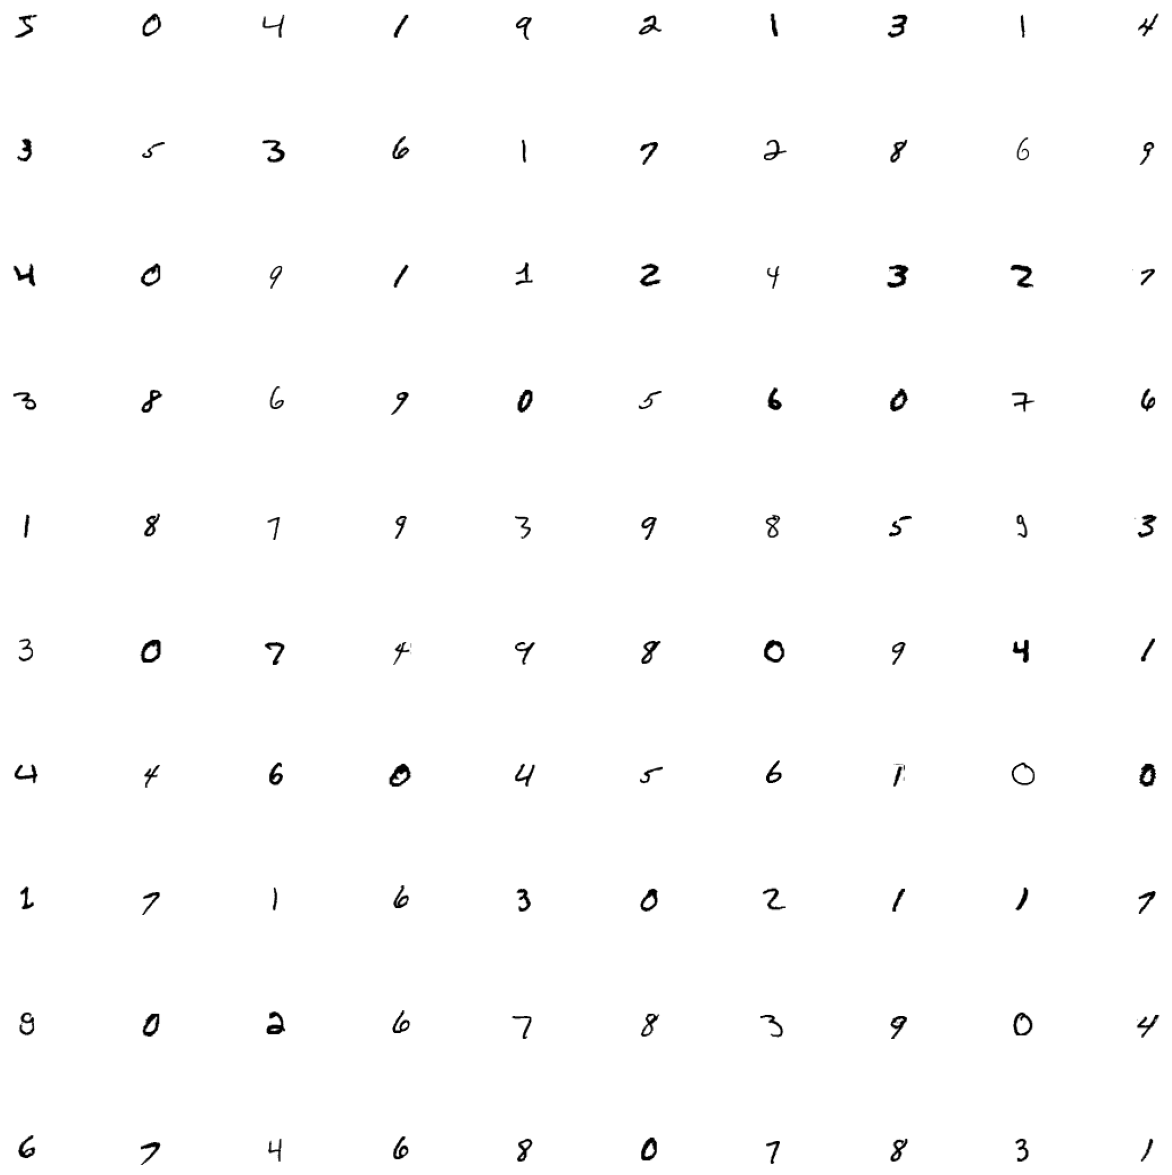

In [19]:
plt.figure(figsize=(15,15))
for index , image_data in enumerate(X[:100]):
  plt.subplot(10,10, index+1)
  plot_digit(image_data)
plt.subplots_adjust(wspace=2, hspace=3)
plt.show()

In [20]:
X_train, X_test , y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [21]:
y_train_5 = (y_train =="5") #true for all 5s, and false for all other digits
y_test_5 = (y_test=="5")

In [22]:
from sklearn.linear_model import SGDClassifier

In [23]:
sgd_clf = SGDClassifier(random_state=42)

In [24]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [25]:
sgd_clf.predict([some_digit])

array([False])

In [26]:
sgd_clf.predict(X[0])

ValueError: ignored

In [27]:
sgd_clf.predict([X[0]])

array([ True])

In [28]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [29]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train))) #prints False: no 5s detected

False


In [30]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [31]:
# Implement Cross Validation Yourself!
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3) #add shuffle = True if the dataset 
                                        # is not already shuffled

for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct/len(y_pred))

0.95035
0.96035
0.9604


In [32]:
#Confusion Matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)
"""
cross_val_predict() performs k-fold cross-validation, 
instead of returning the evaluation scores, it returns the predictions made 
on each test fold. This means that you get a clean prediction for each
instance in the training set"""

'\ncross_val_predict() performs k-fold cross-validation, \ninstead of returning the evaluation scores, it returns the predictions made \non each test fold. This means that you get a clean prediction for each\ninstance in the training set'

In [33]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [34]:
y_train_pred.shape

(60000,)

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [36]:
"""
Each row in a confusion matrix: an actual class
each column: a predicted class
The first row considers non-5 images (the negative class): 
53,892 of them were correctly classified as non-5s (true negatives), 
the remaining 687 were wrongly classified as 5s (false positives / type I errors)
The second row considers the images of 5s (the positive class):
1,891 were wrongly classified as non-5s (false negatives/ type II errors),
the remaining 3,530 were correctly classified as 5s (true positives)
A perfect classifier would only have true positives and true negatives
its confusion matrix would have nonzero values only on its main diagonal 
(top left to bottom right)"""

y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [37]:
confusion_matrix(y_train_perfect_predictions,y_train_5)

array([[54579,     0],
       [    0,  5421]])

In [38]:
#Recall and Precision
from sklearn.metrics import precision_score, recall_score
precision_score (y_train_5, y_train_pred)# == 3530 / (687 + 3530)


0.8370879772350012

In [39]:
recall_score(y_train_5, y_train_pred) # == 3530 / (1891 + 3530)


0.6511713705958311

In [40]:
#  computes the precision: TP / (FP + TP)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8370879772350012

In [41]:
#  computes the precision: TP / (FN + TP)
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.6511713705958311

In [42]:
# the F1 Score
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)


0.7325171197343846

In [43]:
y_score = sgd_clf.decision_function([X[0]])

In [44]:
y_score

array([2164.22030239])

In [45]:
y_score2 = sgd_clf.decision_function([X[1]])

In [46]:
y_score2

array([-5897.37359354])

In [47]:
threshold = 0

In [48]:
y_digit_pred = y_score > threshold

In [49]:
y_digit_pred

array([ True])

In [50]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method = "decision_function")

In [51]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [52]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

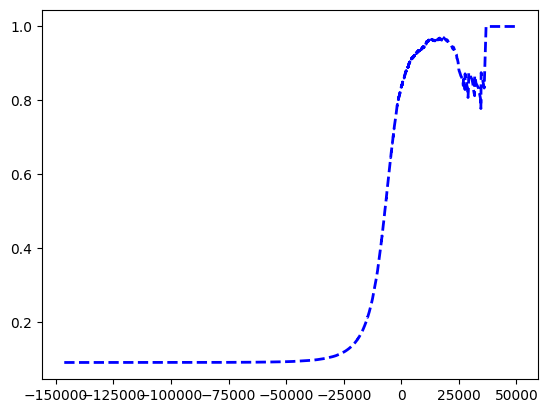

In [53]:
plt.plot(thresholds, precisions[:-1],"b--",label = "Precision", linewidth = 2 )

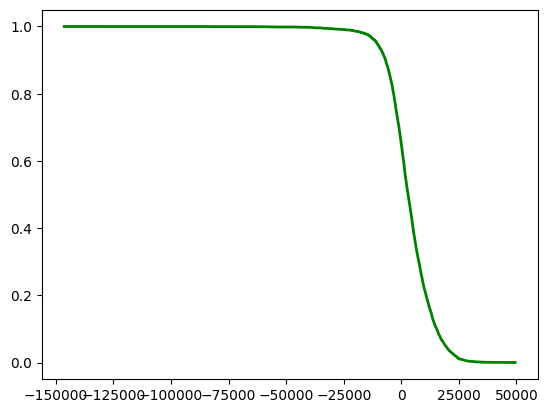

In [54]:
plt.plot(thresholds, recalls[:-1], "g-", label = "Recall", linewidth = 2)

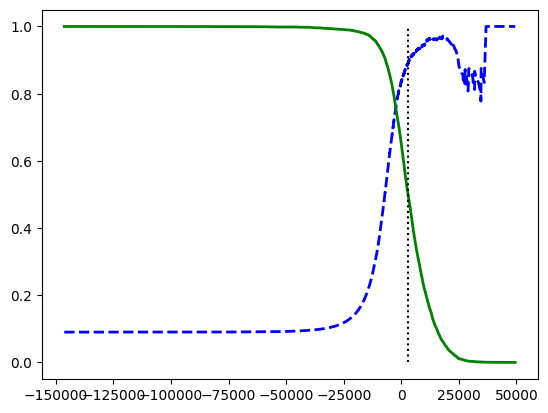

In [55]:
plt.plot(thresholds, precisions[:-1],"b--",label = "Precision", linewidth = 2 )
plt.plot(thresholds, recalls[:-1], "g-", label = "Recall", linewidth = 2)
plt.vlines(3000, 0, 1.0, "k", "dotted", label = "threshold")
plt.show()

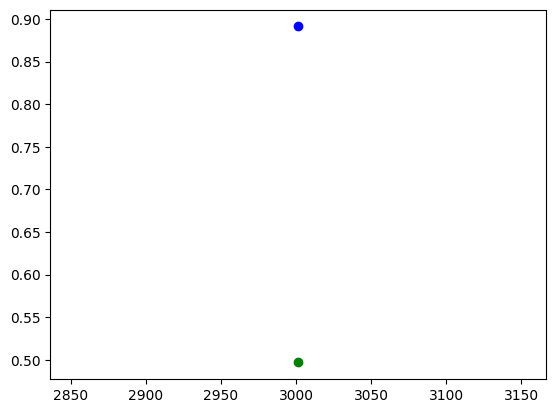

In [56]:
idx = (thresholds >= 3000).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.show()

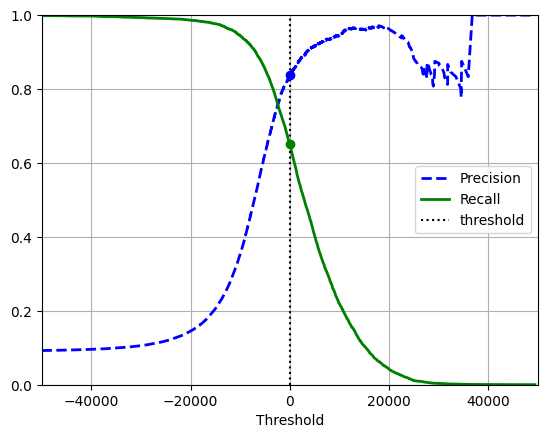

In [57]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()

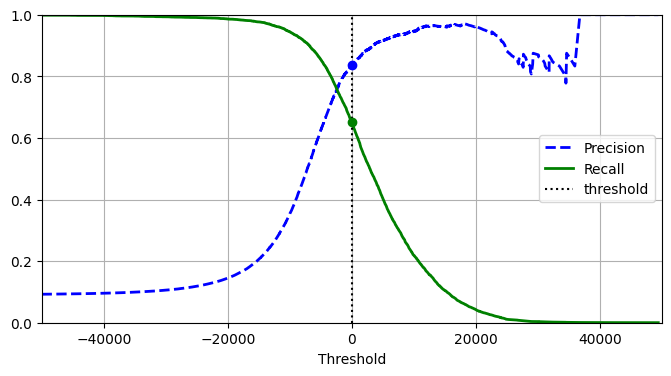

In [58]:
plt.figure(figsize=(8, 4))  
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()

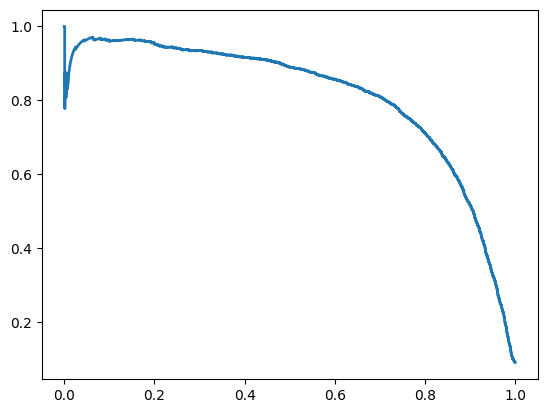

In [59]:
#"Precision/Recall curve"
plt.plot(recalls, precisions, linewidth = 2 , label ="Precision/Recall curve")

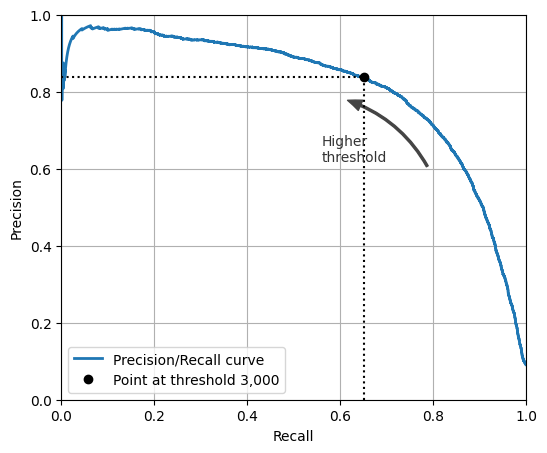

In [60]:
import matplotlib.patches as patches  #for the curved arrow

plt.figure(figsize=(6, 5))  #not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

#just beautifies
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [61]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_presision = thresholds [idx_for_90_precision]
threshold_for_90_presision

3370.0194991439557

In [62]:
precisions

array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
       1.        ])

In [63]:
y_train_pred_90 = (y_scores >= threshold_for_90_presision)

In [64]:
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [65]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [66]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)

In [67]:
recall_at_90_precision

0.4799852425751706

In [68]:
"""ROC curve: the ROC curve plots the true positive rate (another name for recall)
against the false positive rate (FPR). The FPR (also called the fall-out) is the
ratio of negative instances that are incorrectly classified as positive. 
It is equal to 1 – the true negative rate (TNR), which is the ratio of negative 
instances that are correctly classified as negative. 
The TNR is also called specificity. Hence, the ROC curve plots
sensitivity (recall) versus 1 – specificity."""

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [69]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_presision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]



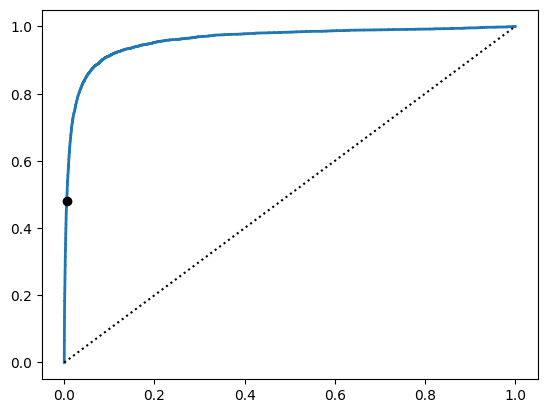

In [70]:
plt.plot(fpr, tpr, linewidth = 2, label = "ROC curve")
plt.plot([0,1],[0,1], "k:", label = "Random classifier's ROC cirve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")


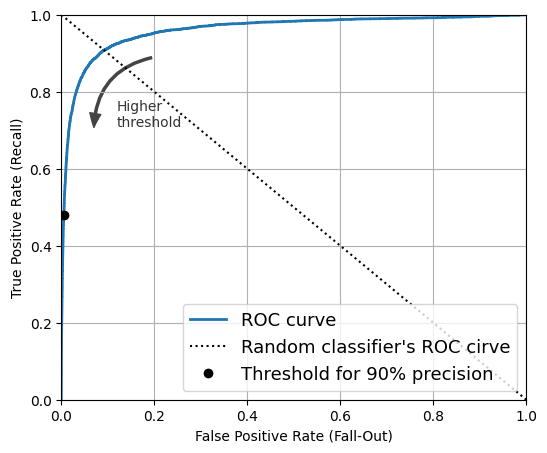

In [71]:
import matplotlib.patches as patches  #for the curved arrow
plt.figure(figsize =(6,5))
plt.plot(fpr, tpr, linewidth = 2, label = "ROC curve")
plt.plot([0,1],[1,0], "k:", label = "Random classifier's ROC cirve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()


In [72]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [73]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [74]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method = "predict_proba")

In [75]:
y_probas_forest[:3]

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04]])

In [76]:
"""
These are estimated probabilities. 
Among the images that the model classified as positive with a probability 
between 50% and 60%, there are actually about 94% positive images:"""
idx_50_to_60 = (y_probas_forest[:,1]>0.50) & (y_probas_forest[:,1] < 0.60)
print(f"{(y_train_5[idx_50_to_60]).sum()/ idx_50_to_60.sum():.1%}")


94.0%


In [77]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest
)

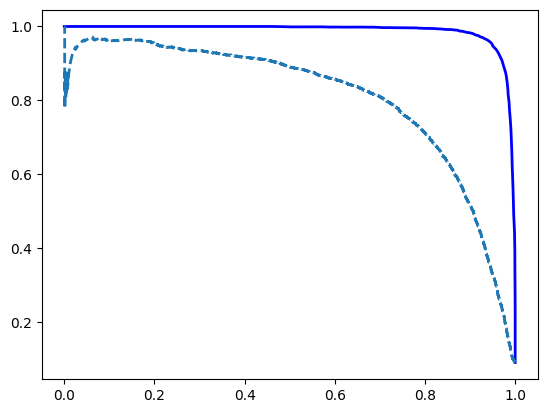

In [78]:
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

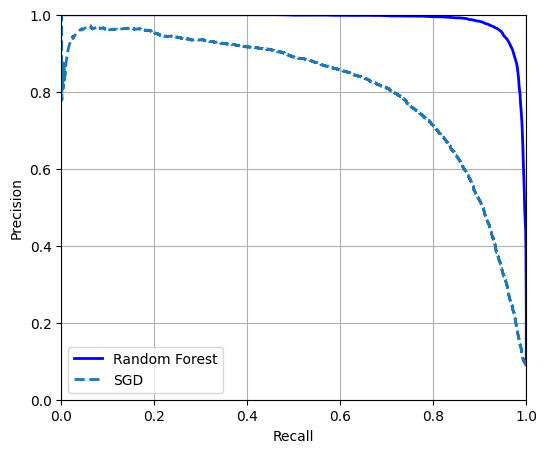

In [79]:
plt.figure(figsize=(6,5))
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0,1, 0,1])
plt.legend(loc="lower left")
plt.grid()

In [80]:
y_probas_forest[1]

array([0.99, 0.01])

In [81]:
y_probas_forest[:,1]

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [82]:
y_train_pred_forest = y_probas_forest[:,1]>=0.5 #positive proba>= 50%
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [83]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [84]:
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

In [85]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

In [86]:
from sklearn.svm import SVC

svm_clf = SVC(random_state = 42)
svm_clf.fit(X_train[:2000], y_train[:2000]) # y_train, not y_train_5:)

SVC(random_state=42)

In [87]:
svm_clf.predict([X[0]])

array(['5'], dtype=object)

In [88]:
svm_clf.predict([X[1]])

array(['0'], dtype=object)

In [89]:
first_data_scores = svm_clf.decision_function([X[0]])

In [90]:
first_data_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [91]:
class_id = first_data_scores.argmax()

In [92]:
class_id

5

In [93]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [94]:
svm_clf.classes_[class_id]

'5'

In [95]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [96]:
ovr_clf.predict([X[0]])

array(['5'], dtype='<U1')

In [97]:
ovr_clf.estimators_


[SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42)]

In [98]:
print(ovr_clf.estimators_)

[SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42)]


In [99]:
len(ovr_clf.estimators_)

10

In [100]:
"""FROM BEFORE: If you want decision_function() to return all 45 scores, 
set the decision_function_shape hyperparameter to "ovo". 
The default value is "ovr", but don't let this confuse you: 
SVC always uses OvO for training. This hyperparameter only affects 
whether or not the 45 scores get aggregated or not:"""
svm_clf.decision_function_shape = "ovo"
some_digit_scores_ovo = svm_clf.decision_function([some_digit])
some_digit_scores_ovo.round(2)

array([[ 1.15,  1.29,  1.2 ,  1.6 ,  1.43,  1.44,  1.25,  1.39,  1.25,
        -0.89, -1.2 , -0.18, -1.35, -0.48, -0.58, -0.96, -0.75, -0.05,
         0.67, -0.31,  0.18,  0.28,  0.3 ,  0.02,  0.75, -0.6 ,  0.22,
         0.55,  0.63,  0.21, -1.14, -0.36, -0.36, -0.48, -0.9 ,  0.59,
         0.7 ,  1.17,  0.5 ,  0.11,  0.04, -0.16, -0.06, -0.36, -0.31]])

In [101]:
sgd_clf = SGDClassifier(random_state = 42)

In [102]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([X[0]])

array(['3'], dtype='<U1')

In [103]:
sgd_clf.decision_function([X[0]]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [104]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")


array([0.87365, 0.85835, 0.8689 ])

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))


In [106]:
X_train_scaled[0].round(2)

array([ 0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00, -0.000e+00, -1.000e-02, -0.000e+00,
       -0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00, -0.000e+00, -0.000e+00, -1.000e-02,
       -1.000e-02, -1.000e-02, -2.000e-02, -2.000e-02, -3.000e-02,
       -3.000e-02, -3.000e-02, -3.000e-02, -3.000e-02, -3.000e-02,
       -3.000e-02, -2.000e-02, -2.000e-02, -2.000e-02, -1.000e-02,
       -1.000e-02, -0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00, -0.000e+00, -1.000e-02,
       -1.000e-02, -1.000e-02, -2.000e-02, -3.000e-02, -4.000e-02,
       -5.000e-02, -7.000e-02, -8.000e-02, -1.000e-01, -1.200e-01,
       -1.300e-01, -1.400e-01, -1.400e-01, -1.300e-01, -1.200e

In [107]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

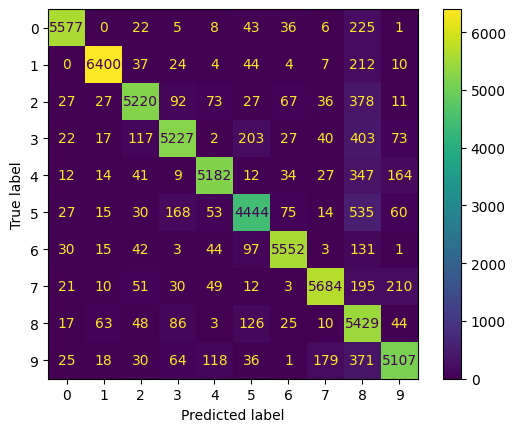

In [108]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)

plt.show()

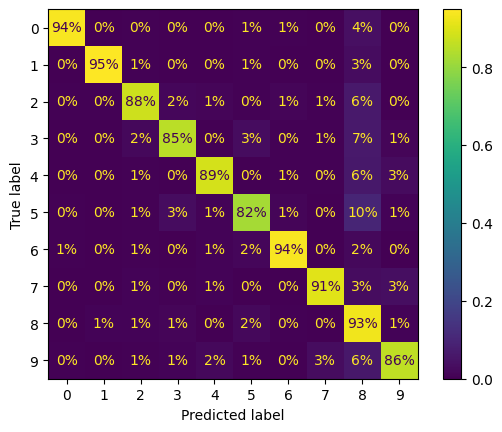

In [110]:
# normalizing the data for a better understanding 
# and to see the 5 row was because lack of data or misclassification
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize = "true", values_format =".0%")
plt.show()


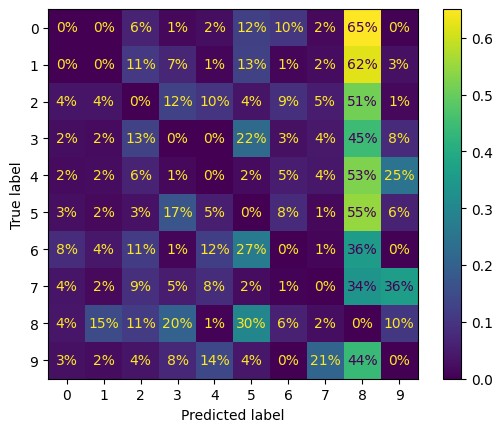

In [111]:
# giving zero weight to the main parts so the errors would stand out.
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight = sample_weight,
                                        normalize = "true", values_format =".0%")
plt.show()

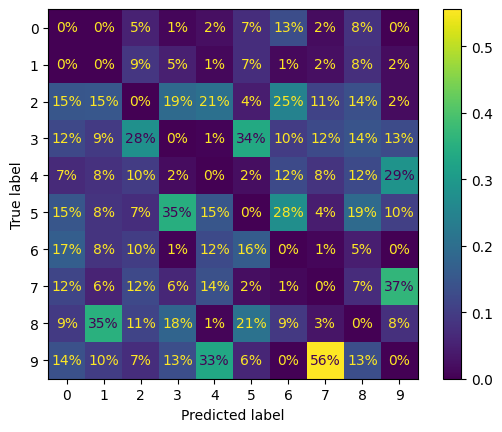

In [112]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight = sample_weight,
                                        normalize = "pred", values_format =".0%")
plt.show()

'\nfig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))\nplt.rc(\'font\', size=9)\nConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])\naxs[0].set_title("Confusion matrix")\nplt.rc(\'font\', size=10)\nConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],\n                                        normalize="true", values_format=".0%")\naxs[1].set_title("CM normalized by row")\nplt.show()'

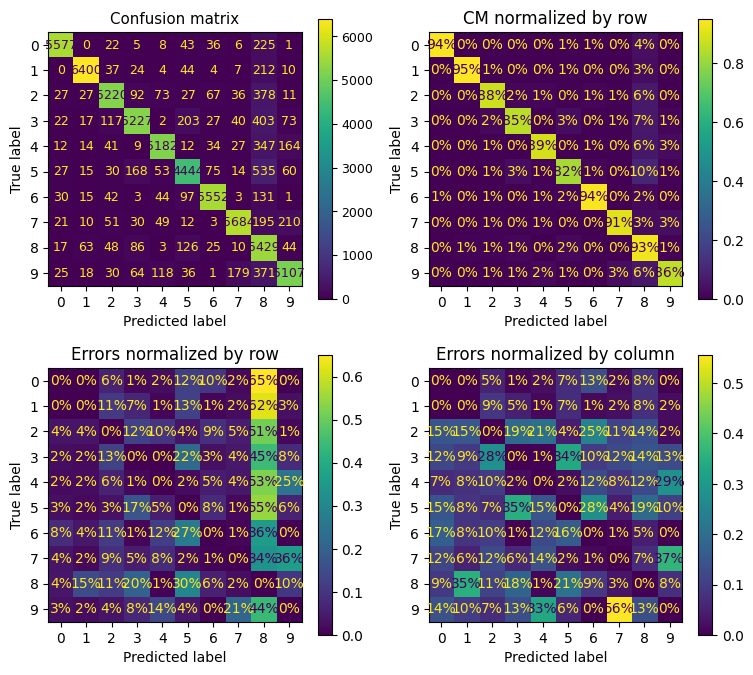

In [120]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(9,8))
plt.rc("font", size = 9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0,0])
axs[0,0].set_title("Confusion matrix")
plt.rc("font", size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0,1],
                                        normalize="true", values_format=".0%")
axs[0, 1].set_title("CM normalized by row")

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1,0],
                                        sample_weight = sample_weight,
                                        normalize = "true", values_format =".0%")
axs[1,0].set_title("Errors normalized by row")

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1,1],
                                        sample_weight = sample_weight,
                                        normalize = "pred", values_format =".0%")
axs[1,1].set_title("Errors normalized by column")
"""
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
plt.show()"""


In [121]:
cl_a , cl_b = "3" , "5"
X_aa = X_train[(y_train == cl_a) & (y_train_pred==cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred==cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred==cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred==cl_b)]


In [123]:
print(X_aa)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Text(0, 0.5, 'True label')

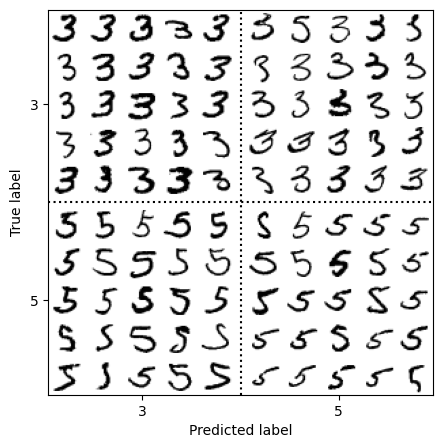

In [122]:
## LATER CHECK AND UNDERSTAND IT BETTER
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")

Note: there are several other ways you could code a plot like this one, but it's a bit hard to get the axis labels right:

* using[nested GridSpecs](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/gridspec_nested.html)

* merging all the digits in each block into a single image (then using 2×2 subplots). For example:

In [124]:
  X_aa[:25].reshape(5, 5, 28, 28).transpose(0, 2, 1, 3).reshape(5 * 28, 5 * 28)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

* using [subfigures](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subfigures.html) (since Matplotlib 3.4)

# Multilabel Classification

In [125]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= "7")
y_train_odd = (y_train.astype("int8")%2 == 1)
y_multilabel = np.c_[y_train_large ,  y_train_odd]
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [126]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)


KNeighborsClassifier()

In [127]:
knn_clf.predict([X[0]])

array([[False,  True]])

In [128]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train,y_multilabel, cv = 3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

"""
o give each label a weight equal to its support (i.e., the number of
instances with that target label). To do this, simply set average="weighted" when
calling the f1_score() function"""

'\no give each label a weight equal to its support (i.e., the number of\ninstances with that target label). To do this, simply set average="weighted" when\ncalling the f1_score() function'

In [129]:
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9778357403921755

In [130]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv = 3, random_state = 42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])


ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [131]:
chain_clf.predict([X[0]])


array([[0., 1.]])

#Multioutput Classification


In [133]:
np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod =  X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test



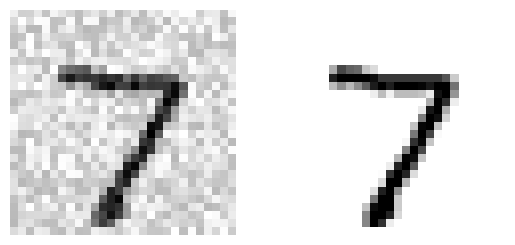

In [134]:
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])

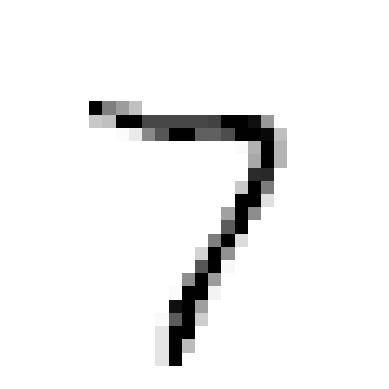

In [135]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()

In [ ]:
#YAY!